# Лаба 1 (Начало)


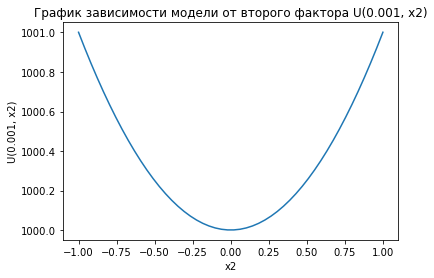

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

u1 = lambda x1, x2: 1 * 0.001 + 1 / x1 * 1 + x1 * 0.001 + x2 * 0.0001 + x2**2 * 1


fig = plt.subplots()
x = np.linspace(-1, 1, 50)
plt.title("График зависимости модели от второго фактора U(0.001, x2)")
plt.xlabel('x2')
plt.ylabel('U(0.001, x2)')
plt.plot(x, u1(0.001, x))
plt.show()

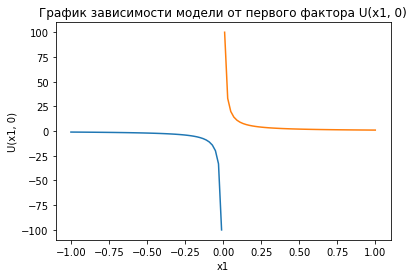

In [2]:
fig = plt.subplots()
x_ = np.linspace(-1, -0.01, 50)
plt.title("График зависимости модели от первого фактора U(x1, 0)")
plt.xlabel('x1')
plt.ylabel('U(x1, 0)')
plt.plot(x_, u1(x_, 0))

x_ = np.linspace(0.01, 1, 50)
plt.plot(x_, u1(x_, 0))
plt.show()

### Генерация данных

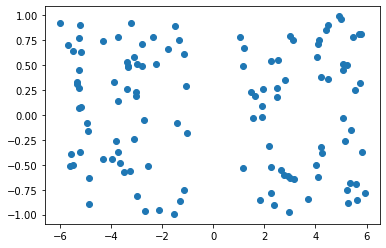

In [3]:
import random as rnd

x1_points = []
x2_points = []

for s in range(0, 120):
    x2_points.append((rnd.random() - 0.5) * 2)
    
for s in range(0, 60):
    x1_points.append(-rnd.random() * 5 - 1)
    x1_points.append(rnd.random() * 5 + 1)
    
for s in range(0, len(x1_points)):
    if x1_points[s] == 0 or x2_points[s] == 0:
        x1_points.remove(s)
        x2_points.remove(s)
        

fig = plt.subplots()
plt.scatter(x1_points, x2_points)
plt.show()

In [4]:
vector_u = list()
leng = len(x1_points)
        
for i in range(leng):
    vector_u.append(u1(x1_points[i], x2_points[i]))

vect_arr_u = np.array(vector_u)
average_u = vect_arr_u.mean()

w2 = np.dot(vect_arr_u - average_u, vect_arr_u - average_u) / (len(vect_arr_u - 1))
p = 0.13
sig = p * (w2)**0.5

# Сгенерировали U с помехами
y = []
for i in range(len(x1_points)):
    y.append(vector_u[i] + np.random.normal(0, sig))

In [5]:
file_1 = open('out_lab_1.txt', 'w')
file_1.write("№\tx1\tx2\tu\ty\n")
for s in range(leng):
    file_1.write(str(s+1)+ "\t" + str(x1_points[s]) + "\t" + str(x2_points[s]) + "\t" + str(vector_u[s]) + "\t" + str(y[s]) + "\n")
    
file_1.close()

# Лаба 2

In [6]:
import math
import scipy
from scipy import optimize

f = lambda x1, x2 : np.array([1, 1/x1, x1, x2, x2**2]) 
teta = np.array([0.001, 1, 0.001, 0.0001, 1])


In [7]:
import math

# Построение матрицы X
X = []
for i in range(len(teta)):
    X.append([])
    for j in range(len(x1_points)):
        X[i].append(f(x1_points[j], x2_points[j])[i])
       
X = np.matrix(X)

Q1 = X.dot(X.T)
Q1 = np.linalg.inv(Q1)
Q1 = Q1.dot(X)
Q1 = Q1 * np.matrix(y).T

In [8]:
e = []
e = y - (X.T).dot(np.matrix(teta).T).T
sigma2 = float(e.dot(e.T)/(len(vect_arr_u)-len(teta))) # Несмещенная оценка оценка дисперсии

F = sigma2 / sig**2

# alpha = 0.05
F_t = 1.2539

string = ''
if F <= F_t:
    string = "Модель адекватная!"
else:
    string = "Модель НЕадекватная!"

file_1 = open('out_lab_2_u_values.txt', 'w')
leng = len(x1_points)
file_1.write("U\ty\tU-y\n")
for s in range(leng):
    file_1.write(str(vect_arr_u[s]) + "\t" + str(y[s]) + "\t" + str(vect_arr_u[s] - y[s]) + "\n")
file_1.close()


file_1 = open('out_lab_2_teta_values.txt', 'w')   
file_1.write("teta\tteta^\n") 
for i in range(4):
    file_1.write(str(teta[i]) + "\t" + str(Q1.A[i][0]) + "\n")
file_1.close()


file_1 = open('out_lab_2_rem_values.txt', 'w')
file_1.write("Sigma**2\tSigma^**2\tF\tF_t\n")
file_1.write(str(sig**2) + "\t" + str(sigma2) + "\t" + str(F) + "\t" + str(F_t) + "\n" + string)
file_1.close()
